In [4]:
%matplotlib inline
import numpy as np
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import pandas as pd
import dask
import os.path
from __future__ import division
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)


from useful import *

global data_dir
data_dir = '/scratch/ap587/dry_data/'


In [5]:
def testfun(exp, do_psi=0, do_log=0, do_seasonal=0):
    runs = range(21,25)
    runset = open_runset(data_dir, exp,runs)    
    
    runset.drop(['ps','vor','div']) 
    runset['p_trop'] = 1000*np.exp(-9.81/(287.04*270)*runset.h_trop*1000)
    c = runset.mean('lon')
    
    vmaxt = 300
    vmint = 200
    vmaxu = 50
    vmaxv = 1.2
    vmaxsf = 1e11
    
    print(c)
    
    if do_psi:
        c.load()
        data = {'omega':c.omega.data, 'vcomp':c.vcomp.data, 'time':c.time.data, 'pfull':c.pfull.data, 'lat':c.lat.data}
        psi = cal_stream_fn(data)
        c['psi'] = (('time','pfull','lat'),psi)
        
        
    plot_grid(c, 'Annual Mean for exp' + exp, do_log=do_log)
        
    plot_timeseries(c.temp, title_text='Mixed layer depth ' + exp[-4,-1] + ' final year bottom level model temperature')
    plot_timeseries(c.teq, title_text='Mixed layer depth ' + exp[-4,-1] + ' final year bottom level equilibrium temperature') 
    plot_timeseries(c.ucomp, vmin=-30, vmax=30, title_text='Mixed layer depth ' + exp[-4,-1] + ' final year bottom level zonal wind')
    
     
    # seaonal lag correction for locating peaks (days) [~35 days for 10m depth]
    #seasonal plots
    if do_seasonal:
        lag_cor = calc_seasonal_lag(c.teq)
        print(lag_cor)
        print(c.time.isel(time=lag_cor))    
        #plot_timeseries(c)    
        n_eq = (np.append(np.arange(0,45), np.arange(315,360)) + lag_cor)%360
        n_sum = (np.arange(45,135) + lag_cor)%360
        s_eq = (np.arange(135,225) + lag_cor)%360
        n_win = (np.arange(225,315) + lag_cor)%360
        sum_sel = np.append(n_sum, np.append(n_sum+360, n_sum+360*2))
        win_sel = np.append(n_win, np.append(n_win+360, n_win+360*2))
        eq_sel = np.append(n_eq, np.append(n_eq+360, n_eq+360*2))
        eq_sel2 = np.append(s_eq, np.append(s_eq+360, s_eq+360*2))
        plot_grid(c.isel(time=sum_sel),  'NH summer mean for exp' + exp, do_log=do_log, vmaxt=vmaxt, vmint=vmint,vmaxu=vmaxu,vmaxsf=vmaxsf)
        plot_grid(c.isel(time=win_sel), 'NH winter mean for exp' + exp,do_log=do_log, vmaxt=vmaxt, vmint=vmint,vmaxu=vmaxu,vmaxsf=vmaxsf)
        plot_grid(c.isel(time=eq_sel), 'Northward equinox mean for exp' + exp, do_log=do_log, vmaxt=vmaxt, vmint=vmint,vmaxu=vmaxu,vmaxsf=vmaxsf)
        plot_grid(c.isel(time=eq_sel2), 'Southward equinox mean for exp' + exp, do_log=do_log, vmaxt=vmaxt, vmint=vmint,vmaxu=vmaxu,vmaxsf=vmaxsf)
    
    c.close()


<xarray.Dataset>
Dimensions:  (lat: 64, latb: 65, lonb: 129, pfull: 32, phalf: 33, time: 360)
Coordinates:
  * phalf    (phalf) float64 0.0 31.25 62.5 93.75 125.0 156.2 187.5 218.8 ...
  * latb     (latb) float64 -90.0 -86.58 -83.76 -80.96 -78.16 -75.36 -72.57 ...
  * lonb     (lonb) float64 -1.406 1.406 4.219 7.031 9.844 12.66 15.47 18.28 ...
  * pfull    (pfull) float64 11.5 45.98 77.6 109.0 140.3 171.6 202.9 234.2 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * time     (time) float64 4.322e+04 4.325e+04 4.327e+04 4.33e+04 4.332e+04 ...
Data variables:
    ps       (time, lat) float64 1.004e+05 9.998e+04 9.939e+04 9.904e+04 ...
    h_trop   (time, lat) float64 5.621 6.626 7.193 7.601 7.922 8.189 8.417 ...
    temp     (time, pfull, lat) float64 247.0 246.8 246.4 246.1 245.8 245.8 ...
    ucomp    (time, pfull, lat) float64 2.326 5.822 10.4 16.36 23.76 32.43 ...
    vcomp    (time, pfull, lat) float64 -0.02338 -0.04748 -0.07121 -0.1124 ...
    b

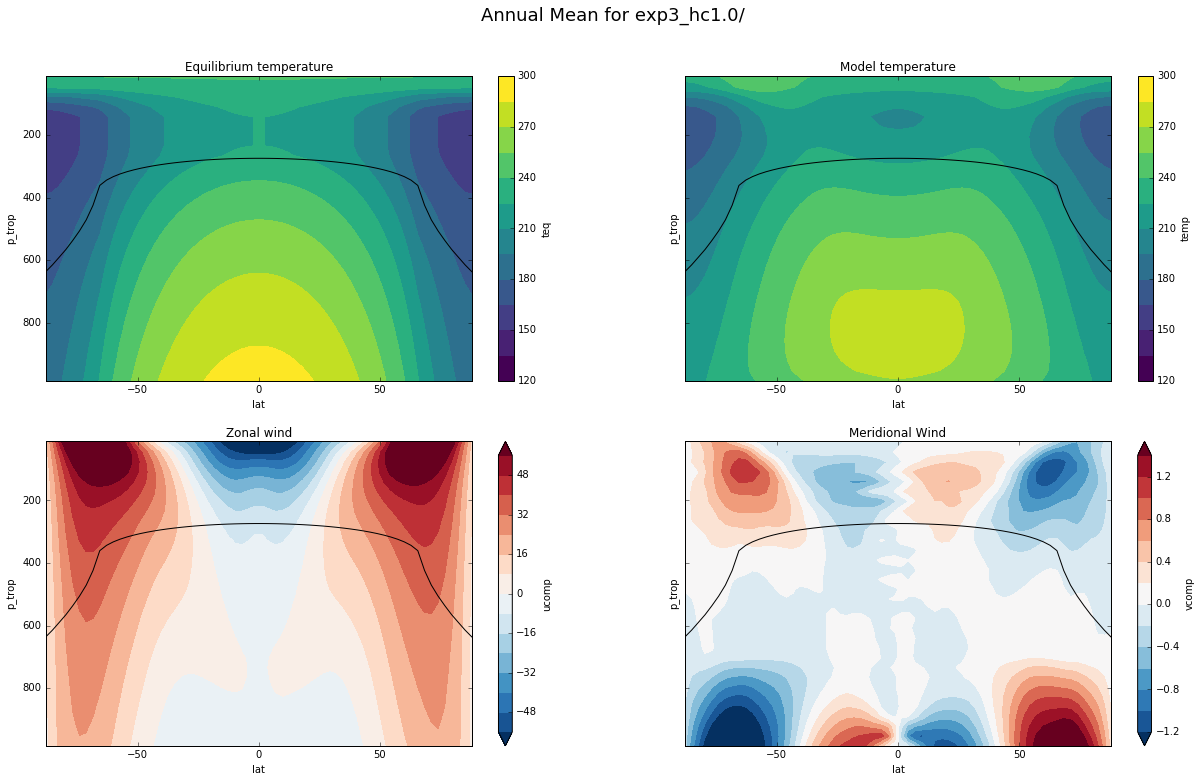

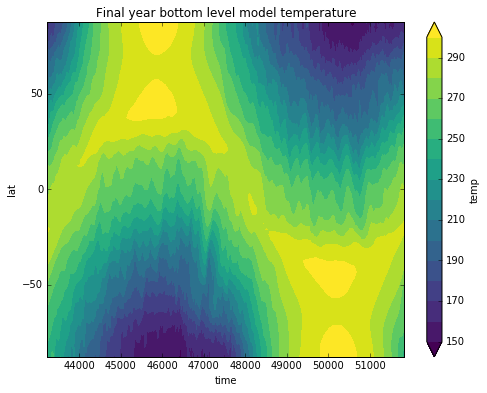

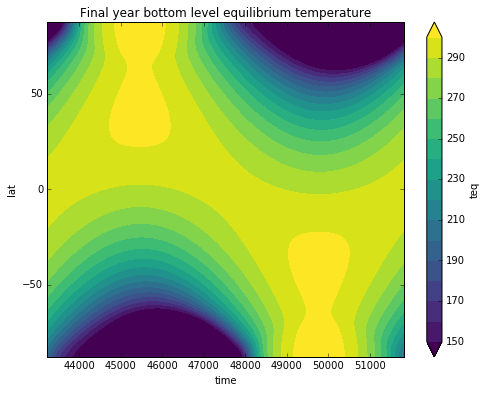

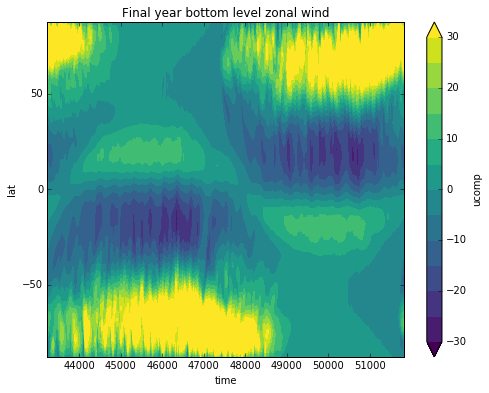

In [6]:
exp = '3_hc1.0/'
testfun(exp)

In [ ]:
exp = '3_hc5.0/'
testfun(exp)